In [88]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [89]:
df = pd.read_csv('/content/PRSA_Data_Gucheng.csv')

df = df.drop(['No','station'],axis = 1)

#Changing the column names
cnames = list(df.columns)

#Drop the first row 
#df = df[24:]

df.dtypes

df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

df_new = df[['year', 'month', 'day', 'hour']]
df_new['date'] = pd.to_datetime(df_new)

df['date'] = df_new['date']

#Set the date as Index
df = df.set_index(df['date'],drop = False)
df = df.sort_index()

# df_cbwd = df['cbwd']
# df_cbwd['cbwd_mode'] = df_cbwd.resample("d").apply(lambda x: stats.mode(x)[0])

# df = df.resample('d').mean()
# df['cbwd'] = df_cbwd['cbwd_mode']

df['day_of_week'] = df.index.dayofweek

def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df['weekend'] = df['day_of_week'].apply(weekend)


mean = df['PM10'].min()
std_dev = df['PM10'].max() - df['PM10'].min()

for field in cnames:
    print(field, df[field].isna().sum())

df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

df = pd.get_dummies(df, columns = ['wd'] )    

#df['PM10'] = df['PM10']
#df = df.drop(['PM10'], axis = 1)

df = df.drop(['hour', 'date'], axis = 1)

cnames = list(df.columns)

year 0
month 0
day 0
hour 0
PM2.5 646
PM10 381
SO2 507
NO2 668
CO 1401
O3 729
TEMP 51
PRES 50
DEWP 51
RAIN 43
wd 159
WSPM 42


In [90]:
print(cnames)

['year', 'month', 'day', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'day_of_week', 'weekend', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']


In [91]:
for field in cnames:
  df[field] = df[field].fillna(df[field].mean())

In [92]:
for field in cnames:
    print(field, df[field].isna().sum())

year 0
month 0
day 0
PM2.5 0
PM10 0
SO2 0
NO2 0
CO 0
O3 0
TEMP 0
PRES 0
DEWP 0
RAIN 0
WSPM 0
day_of_week 0
weekend 0
wd_E 0
wd_ENE 0
wd_ESE 0
wd_N 0
wd_NE 0
wd_NNE 0
wd_NNW 0
wd_NW 0
wd_S 0
wd_SE 0
wd_SSE 0
wd_SSW 0
wd_SW 0
wd_W 0
wd_WNW 0
wd_WSW 0


In [93]:
df.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 01:00:00,2013,3,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 02:00:00,2013,3,1,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-03-01 03:00:00,2013,3,1,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-03-01 04:00:00,2013,3,1,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
df['pm10'] = df['PM10']
df = df.drop('PM10', axis = 1)
df['PM10'] = df['pm10']
df = df.drop('pm10', axis = 1)
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18.0
2013-03-01 01:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0
2013-03-01 02:00:00,2013,3,1,5.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0
2013-03-01 03:00:00,2013,3,1,6.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
2013-03-01 04:00:00,2013,3,1,5.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17.0


In [95]:
df = df.resample('d').mean()

In [96]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,8.625000,7.723590,48.934229,888.498934,76.320620,1.691667,1024.816667,-19.691667,0.0,2.350000,4,0,0.166667,0.333333,0.083333,0.000000,0.125000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.125000,0.000000,16.875000
2013-03-02,2013,3,2,36.916667,37.291667,38.327961,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,5,1,0.125000,0.208333,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.083333,0.041667,0.166667,0.083333,0.083333,0.000000,0.000000,0.000000,51.375000
2013-03-03,2013,3,3,80.333333,47.541667,62.400551,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,6,1,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.083333,0.000000,0.083333,0.083333,0.041667,0.083333,0.041667,0.375000,0.000000,120.041667
2013-03-04,2013,3,4,26.500000,18.666667,44.268871,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,0,0,0.083333,0.000000,0.083333,0.083333,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.083333,0.083333,0.041667,0.166667,0.166667,0.041667,51.291667
2013-03-05,2013,3,5,136.708333,72.640257,63.216460,1376.747869,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1,0,0.083333,0.041667,0.041667,0.041667,0.125000,0.000000,0.083333,0.041667,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.166667,0.000000,172.541667


In [97]:
df = df.iloc[:-4,:]

In [98]:
for field in cnames:
	df[field] = (df[field] - df[field].min())/(df[field].max() - df[field].min())

In [100]:
train_x = df['PM10'][:-4]
test_x = df['PM10'][-4:]
train_x.head()

date
2013-03-01    0.018881
2013-03-02    0.080672
2013-03-03    0.203657
2013-03-04    0.080522
2013-03-05    0.297687
Freq: D, Name: PM10, dtype: float64

In [101]:
train_cps_log = train_x.values

test_cps_log = test_x.values
print(train_cps_log.shape, test_cps_log.shape)

(1453,) (4,)


In [102]:
!pip install pyramid-arima

In [103]:
from pyramid.arima import auto_arima

'''SARIMA Implementation on log model'''

stepwise_model_log = auto_arima(train_cps_log, start_p = 1, start_q = 1,
                            max_p = 2, max_q = 2, m = 12,
                            start_P = 0, seasonal = False,
                            d = 0, D = 1, trace = True,
                            error_action = 'ignore',
                            suppress_warnings = True,
                            stepwise_warnings = True,
                            stepwise = True)

print(stepwise_model_log.aic())

Fit ARIMA: order=(1, 0, 1); AIC=-2205.733, BIC=-2184.607, Fit time=0.258 seconds
Fit ARIMA: order=(0, 0, 0); AIC=-1705.107, BIC=-1694.544, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-2192.346, BIC=-2176.502, Fit time=0.028 seconds
Fit ARIMA: order=(0, 0, 1); AIC=-2147.069, BIC=-2131.225, Fit time=0.030 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-2204.863, BIC=-2178.456, Fit time=0.311 seconds
Fit ARIMA: order=(1, 0, 2); AIC=-2205.566, BIC=-2179.159, Fit time=0.289 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-2213.711, BIC=-2182.023, Fit time=0.825 seconds
Total fit time: 1.750 seconds
-2213.7113989175705


In [104]:
stepwise_model_log.fit(train_cps_log)
print('Done')

Done


In [105]:
future_forecast_log = stepwise_model_log.predict(n_periods = 4)

In [106]:
y_hat = (future_forecast_log*std_dev)+mean
y_test = (test_cps_log*std_dev)+mean

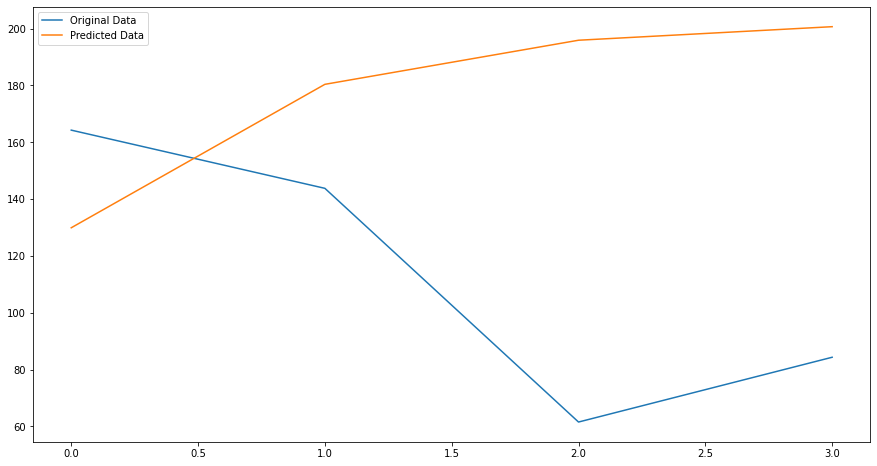

In [107]:
# future_forecast_antilog = np.exp(future_forecast_log)   #Converting log into normal values

#Visualisation of Predicted vs Original
plt.plot(y_test, label = 'Original Data')
plt.plot(y_hat, label = 'Predicted Data')
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, y_hat))
print(rms_new)

mse_new = mean_squared_error(y_test, y_hat)
print(mse_new)

mae_new = mean_absolute_error(y_test, y_hat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, y_hat)
print(mape_new)

92.35851626763571
8530.09552715913
80.43012534010158
100.70550925914281
